# Solução do problema do Caixeiro Viajante (TSP)

### Uso de cinco técnicas diferentes
1. Busca exaustiva
2. Greedy
3. Hill Climbing
4. Simulated Annealing
5. Algoritmo Genético


Exaustiva
Ordem: (8, 6, 2, 1, 3, 7, 4, 9, 5, 0)  Distancia: 216.413047975
Tempo: 21.000268936157227

Greedy
Ordem: [3 1 2 6 8 0 5 9 4 7]  Distancia: 263.510414407
Tempo: 0.00013685226440429688

Hill Climbing
Ordem: [0 9 7 3 6 5 2 4 8 1]  Distancia: 452.122642248
Tempo: 0.020920991897583008

Simulated Annealing
Ordem: [5 9 4 7 3 1 2 6 8 0]  Distancia: 219.261202032
Tempo: 0.025136947631835938

Algoritmo Genético
Ordem: [8 6 2 1 3 7 4 0 5 9]  Distancia: 259.332781564
Tempo:  2.766564130783081


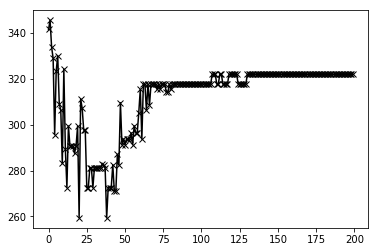

In [9]:
# Stephen Marsland, 2008, 2014
# Adaptação e correção de bugs por Hendrik Macedo, 2017

import numpy as np
import random
import pylab as pl
import time

def makeTSP(nCities):
	positions = 100*np.random.rand(nCities,2)-1;
	distances = np.zeros((nCities,nCities))

	for i in range(nCities):
		for j in range(i+1,nCities):
			distances[i,j] = np.sqrt((positions[i,0] - positions[j,0])**2 + (positions[i,1] - positions[j,1])**2);
			distances[j,i] = distances[i,j];

	return distances

def exhaustive(distances):
	nCities = np.shape(distances)[0]

	cityOrder = np.arange(nCities)

	distanceTravelled = 0
	for i in range(nCities-1):
		distanceTravelled += distances[cityOrder[i],cityOrder[i+1]]
	distanceTravelled += distances[cityOrder[nCities-1],0]

	for newOrder in permutation(range(nCities)):
		possibleDistanceTravelled = 0
		for i in range(nCities-1):
			possibleDistanceTravelled += distances[newOrder[i],newOrder[i+1]]
		possibleDistanceTravelled += distances[newOrder[nCities-1],0]
			 
		if possibleDistanceTravelled < distanceTravelled:
			distanceTravelled = possibleDistanceTravelled
			cityOrder = newOrder

	return cityOrder, distanceTravelled
	
def permutation(order):
	order = tuple(order)
	if len(order)==1:
		yield order
	else:
		for i in range(len(order)):
			rest = order[:i] + order[i+1:]
			move = (order[i],)
			for smaller in permutation(rest):
				yield move + smaller
		
def greedy(distances):
	nCities = np.shape(distances)[0]
	distanceTravelled = 0
	
	# Need a version of the matrix we can trash
	dist = distances.copy()

	cityOrder = np.zeros(nCities, dtype=int)
	cityOrder[0] = np.random.randint(nCities)
	dist[:,int(cityOrder[0])] = np.Inf

	for i in range(nCities-1):
		cityOrder[i+1] = np.argmin(dist[cityOrder[i],:])
		distanceTravelled  += dist[cityOrder[i],cityOrder[i+1]]
		# Now exclude the chance of travelling to that city again
		dist[:,cityOrder[i+1]] = np.Inf
	
	# Now return to the original city
	distanceTravelled += distances[cityOrder[nCities-1],0]

	return cityOrder, distanceTravelled

def hillClimbing(distances):

	nCities = np.shape(distances)[0]

	cityOrder = np.arange(nCities)
	np.random.shuffle(cityOrder)

	distanceTravelled = 0
	for i in range(nCities-1):
		distanceTravelled += distances[cityOrder[i],cityOrder[i+1]]
	distanceTravelled += distances[cityOrder[nCities-1],0]

	for i in range(1000):
		# Choose cities to swap
		city1 = np.random.randint(nCities)
		city2 = np.random.randint(nCities)

		if city1 != city2:
			# Reorder the set of cities
			possibleCityOrder = cityOrder.copy()
			possibleCityOrder = np.where(possibleCityOrder==city1,-1,possibleCityOrder)
			possibleCityOrder = np.where(possibleCityOrder==city2,city1,possibleCityOrder)
			possibleCityOrder = np.where(possibleCityOrder==-1,city2,possibleCityOrder)

			# Work out the new distances
			# This can be done more efficiently
			newDistanceTravelled = 0
			for j in range(nCities-1):
				newDistanceTravelled += distances[possibleCityOrder[j],possibleCityOrder[j+1]]
			distanceTravelled += distances[cityOrder[nCities-1],0]
	
			if newDistanceTravelled < distanceTravelled:
				distanceTravelled = newDistanceTravelled
				cityOrder = possibleCityOrder

	return cityOrder, distanceTravelled
	

def simulatedAnnealing(distances):

	nCities = np.shape(distances)[0]

	cityOrder = np.arange(nCities)
	np.random.shuffle(cityOrder)

	distanceTravelled = 0
	for i in range(nCities-1):
		distanceTravelled += distances[cityOrder[i],cityOrder[i+1]]
	distanceTravelled += distances[cityOrder[nCities-1],0]

	T = 500
	c = 0.8
	nTests = 1000

	#while T>1:
	for i in range(nTests):
			# Choose cities to swap
			city1 = np.random.randint(nCities)
			city2 = np.random.randint(nCities)

			if city1 != city2:
				# Reorder the set of cities
				possibleCityOrder = cityOrder.copy()
				possibleCityOrder = np.where(possibleCityOrder==city1,-1,possibleCityOrder)
				possibleCityOrder = np.where(possibleCityOrder==city2,city1,possibleCityOrder)
				possibleCityOrder = np.where(possibleCityOrder==-1,city2,possibleCityOrder)

				# Work out the new distances
				# This can be done more efficiently
				newDistanceTravelled = 0
				for j in range(nCities-1):
					newDistanceTravelled += distances[possibleCityOrder[j],possibleCityOrder[j+1]]
				distanceTravelled += distances[cityOrder[nCities-1],0]

				if (newDistanceTravelled < distanceTravelled) or ((distanceTravelled - newDistanceTravelled) > T*np.log(np.random.rand())):
					distanceTravelled = newDistanceTravelled
					cityOrder = possibleCityOrder

			# Annealing schedule
			T = c*T

	return cityOrder, distanceTravelled

def fit(pop, distances):
	nCities = np.shape(distances)[0]
	fitness = np.zeros(np.shape(pop)[0])
	
	for j in range (np.shape(pop)[0]):
		for i in range(nCities-1):            
			fitness[j] += distances[pop[j][i],pop[j][i+1]]
		fitness[j] += distances[pop[j][nCities-1],pop[j][0]]
	return fitness

class ga:

	def __init__(self,stringLength,distances,nEpochs=300,populationSize=500,mutationProb=0.05):
		""" Constructor"""
		self.stringLength = stringLength
		
		# Population size should be even
		if np.mod(populationSize,2)==0:
			self.populationSize = populationSize
		else:
			self.populationSize = populationSize+1
		
		if mutationProb < 0:
			 self.mutationProb = 1/stringLength
		else:
			 self.mutationProb = mutationProb
			 	  
		self.nEpochs = nEpochs

		self.fitnessFunction = 'fit'
        
		#Na Codificação por Permutação, cada cromossoma é uma série de números que representa uma posição em uma seqüência
		#Codificação: Os cromossomas descrevem a ordem em que o caixeiro visitará as cidades.
		data = range(0, self.stringLength)
		self.population = np.zeros((self.populationSize,self.stringLength), dtype=np.int)
		for i in range(self.populationSize):
            
			self.population[i] = random.sample(data, self.stringLength)
		self.distances = distances
        
	def runGA(self):
		"""The basic loop"""
		best_value = np.zeros(self.nEpochs)
		best_order = np.zeros((self.nEpochs,self.stringLength), dtype=np.int)

		for i in range(self.nEpochs):
			# Compute fitness of the population
			fitness = eval(self.fitnessFunction)(self.population, self.distances)

			# Pick parents -- can do in order since they are randomised
			newPopulation = self.fps(self.population,fitness)
            
			# Apply the genetic operators
			newPopulation = self.spCrossover(newPopulation)
			newPopulation = self.mutate(newPopulation)


			best_value[i] = min(fitness)
			best_order[i] = self.population[np.argmin(fitness)]
			#print (i, " Ordem: ", best_order[i]," Distancia:",best_value[i])
			self.population = newPopulation

		b_v = min(best_value)
		b_o = best_order[np.argmin(best_value)]
		#return best_order[self.nEpochs-1], best_value[self.nEpochs-1], best_value
		return b_o, b_v, best_value    
		#pl.show()

        
	def fps(self,population,fitness):
		#Probabilidade de uma string ser selecionada é proporcional à sua aptidão dentro da população
		# Scale fitness by total fitness
		fitness = 1/fitness
		fitness = fitness/np.sum(fitness)
		fitness = 10*fitness/fitness.max()
		
		# Put repeated copies of each string in according to fitness
		# Deal with strings with very low fitness
		j=0
		while np.round(fitness[j])<1:
			j = j+1
		
		newPopulation = np.kron(np.ones((int(np.round(fitness[j])),1), dtype=np.int),population[j,:])

		# Add multiple copies of strings into the newPopulation
		for i in range(j+1,self.populationSize):
			if np.round(fitness[i])>=1:
				newPopulation = np.concatenate((newPopulation,np.kron(np.ones((int(np.round(fitness[i])),1), dtype=np.int),population[i,:])),axis=0)

		# Shuffle the order (note that there are still too many)
		indices = list(range(np.shape(newPopulation)[0]))
		np.random.shuffle(indices)
		newPopulation = newPopulation[indices[:self.populationSize],:]
		return newPopulation	
    
	def spCrossover(self,population):
		# Single point crossover
		#order crossover operator (OX1): A portion of one parent is mapped to a portion of the other parent. 
		#From the replaced portion on, the rest is filled up by the remaining genes, where already present 
		#genes are omitted and the order is preserved.
        
		# Cruzamento com permutação em Ponto único - parte do primeiro pai (isto é, parte da seqüencia das cidades) é copiada 
		# e o resto das cidades é copiada na mesma seqüência do segundo pai
		newPopulation = np.zeros(np.shape(population), dtype=np.int)
		crossoverPoint = np.random.randint(0,self.stringLength,self.populationSize)
		for i in range(0,self.populationSize,2):
            
			newPopulation[i,:crossoverPoint[i]] = population[i,:crossoverPoint[i]]
			newPopulation[i+1,:crossoverPoint[i]] = population[i+1,:crossoverPoint[i]]

			p1 = crossoverPoint[i]
			p2 = crossoverPoint[i]
			for j in range(self.stringLength):
				if population[i+1,j] not in newPopulation[i,:crossoverPoint[i]]:
					newPopulation[i,p1]=population[i+1,j]
					p1 += 1
				if population[i,j] not in newPopulation[i+1,:crossoverPoint[i]]:
					newPopulation[i+1,p2]=population[i,j]
					p2 += 1


		return newPopulation
    
	def mutate(self,population):
		# Mutation
		whereMutate = np.random.sample(np.shape(population)[0])
		population[np.where(whereMutate < self.mutationProb)] = self.mutateIndividual(population[np.where(whereMutate < self.mutationProb)])
		return population

	def mutateIndividual(self,population):
		# Mutation
		for i in range(np.shape(population)[0]):
			i0 = np.random.randint(self.stringLength)
			i1 = np.random.randint(self.stringLength)
			v = population[i][i0]
			population[i][i0] = population[i][i1]
			population[i][i1] = v
		return population

def runAll():
	import time

	nCities = 10
	distances = makeTSP(nCities)
    
	print ("\nExaustiva")
	start = time.time()
	result = exhaustive(distances)
	finish = time.time()
	print ("Ordem:",result[0]," Distancia:",result[1])
	print ("Tempo:",finish-start)

	print ("\nGreedy")
	start = time.time()
	result = greedy(distances)
	finish = time.time()
	print ("Ordem:",result[0]," Distancia:",result[1])
	print ("Tempo:",finish-start)

	print ("\nHill Climbing")
	start = time.time()
	result = hillClimbing(distances)
	finish = time.time()
	print ("Ordem:",result[0]," Distancia:",result[1])
	print ("Tempo:",finish-start)

	print ("\nSimulated Annealing")
	start = time.time()
	result = simulatedAnnealing(distances)
	finish = time.time()
	print ("Ordem:",result[0]," Distancia:",result[1])
	print ("Tempo:",finish-start)

    
#elitismo, torneio, e crossover uniforme não foram implementados a tempo
#falando em tempo, alterei a implementação da execução do GA, para computar o tempo de execução no final da execução,
#e antes de desenhar o gráfico, ao invés de calcular após instanciar o GA.
	print ("\nAlgoritmo Genético")
	pl.ion()
	pl.show()

	plotfig = pl.figure()
    
	start = time.time()
	iga = ga(nCities,distances, nEpochs=20*nCities,populationSize=20*nCities,mutationProb=0)
	result = iga.runGA()
	finish = time.time()    
	print ("Ordem:",result[0]," Distancia:",result[1])    
	print ("Tempo: ",finish-start)
	pl.ion()    
	pl.plot(result[2],'kx-')
	pl.pause(0)

runAll()